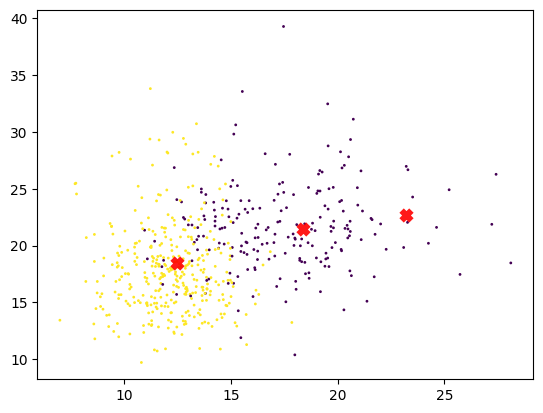

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

plt.scatter(X[:, 0], X[:, 1], c=y, s=1)

kmeans = KMeans(n_clusters=3, algorithm="lloyd", max_iter=10, n_init=10)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=10, linewidths=10,
                color="red", zorder=10, alpha=0.9)

plt.show()

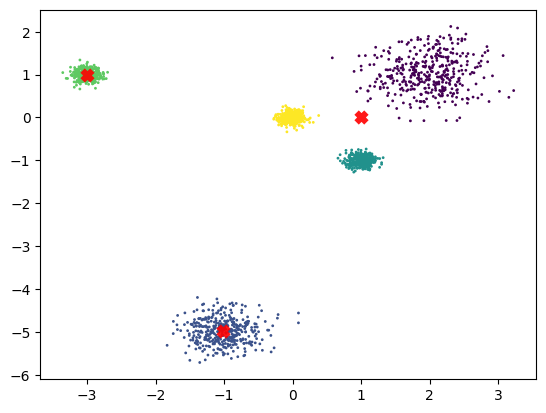

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 1], [-1, -5], [1, -1], [-3, 1], [0, 0]]
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=centers, cluster_std=blob_std)

plt.scatter(X[:, 0], X[:, 1], c=y, s=1)

kmeans = KMeans(n_clusters=3, algorithm="lloyd", max_iter=10, n_init=10)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=10, linewidths=10,
                color="red", zorder=10, alpha=0.9)

plt.show()

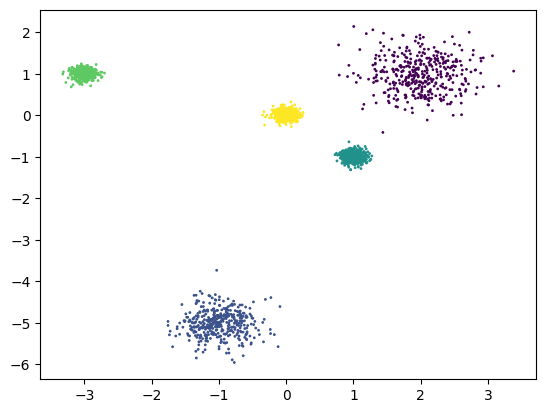

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

centers = [[2, 1], [-1, -5], [1, -1], [-3, 1], [0, 0]]
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=centers, cluster_std=blob_std)

plt.scatter(X[:, 0], X[:, 1], c=y, s=1)

In [4]:
gs = GridSearchCV(
    KMeans(n_init=10),
    {
        "n_clusters": range(2, 10),
        "algorithm": ["lloyd", "kmeans++", "elkan"],
        "max_iter": range(10, 25)
    }
)
gs.fit(X)

/home/toto/vscode/uni/code-ingegneria-informatica/dataMining/esercitazioni/e/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/home/toto/vscode/uni/code-ingegneria-informatica/dataMining/esercitazioni/e/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 893, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/home/toto/vscode/uni/code-ingegneria-informatica/dataMining/esercitazioni/e/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  

GridSearchCV(estimator=KMeans(n_init=10),
             param_grid={'algorithm': ['lloyd', 'kmeans++', 'elkan'],
                         'max_iter': range(10, 25),
                         'n_clusters': range(2, 10)})

In [5]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

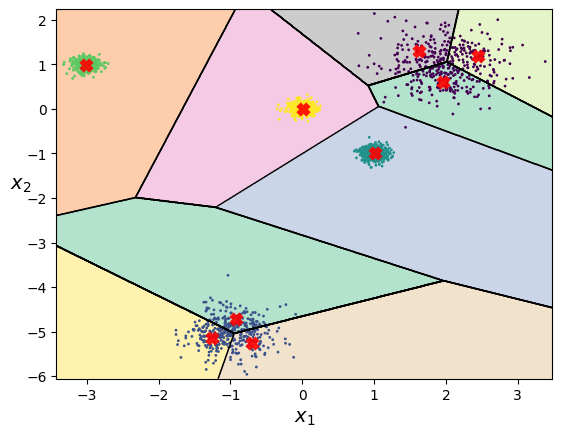

In [6]:
n_clusters = gs.best_params_["n_clusters"]
algorithm = gs.best_params_["algorithm"]
max_iter = gs.best_params_["max_iter"]
kmeans = KMeans(n_clusters=n_clusters, algorithm=algorithm, max_iter=max_iter, n_init=10)
kmeans.fit(X)

centroids = kmeans.cluster_centers_

plot_decision_boundaries(kmeans, X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=10, linewidths=10,
                color="red", zorder=10, alpha=0.9)

plt.show()

## DBSCAN

In [7]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


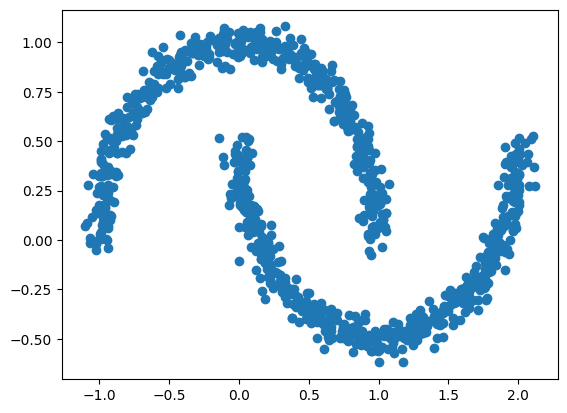

In [8]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.scatter(X[:,0], X[:,1])

In [9]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

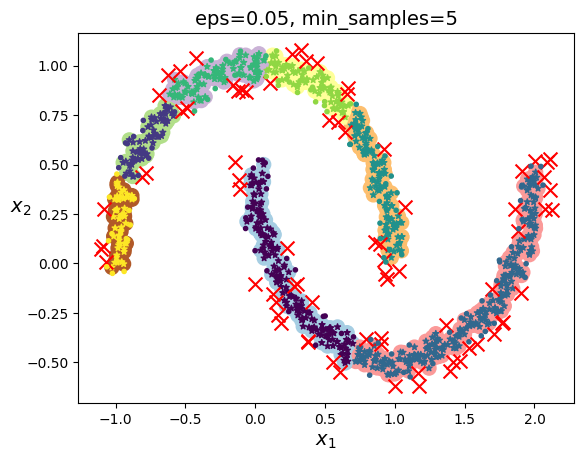

In [10]:
plot_dbscan(dbscan, X, size=100)
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    DBSCAN(min_samples=5),
    {
        "eps": np.linspace(0.01, 0.3, 30),
    }
)
gs.fit(X)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator DBSCAN() does not.